# Algorithms 202: Coursework 1 Task 1: Sorting

Group members: Glen Rodgers, Summer Jones, Leanne Lyons 

# Objectives

The aim of this coursework is to enhance your algorithmic skills by mastering the divide and conquer and dynamic programming strategies. You are asked to show that you can:

- implement divide and conquer solutions for given problems
- compare naive and advanced implementations of algorithms solving the same problem

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

The comparisons of different algorithms involve textual descriptions and graphical plots. For graphing you will be using [matplotlib](http://matplotlib.org/index.html) to generate plots. [This tutorial](http://matplotlib.org/index.html) will be useful to go through to get you up to speed. For the textual descriptions you may wish to use [LaTeX](http://en.wikipedia.org/wiki/LaTeX) inline like $\mathcal{O}(n\log{}n)$. Double click this cell to reveal the required markup - and [see here](http://texblog.org/2014/06/24/big-o-and-related-notations-in-latex/) for useful guidance on producing common symbols used in asymptotic run time analysis.

# Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [1]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock

# a timer - runs the provided function and reports the
# run time in ms
def time_f(f):
    before = clock()
    f()
    after = clock()
    return after - before

# remember - lambdas are just one line functions

# make us a random list length (between 1 - 2000)
# rand_len = lambda max_len=2e3: randint(1, max_len)
# rand_len = lambda max_len=2e3: randint(1, max_len)


# choose a random value for a list element (between 0 1e6)
rand_int = lambda: randint(0, 1e6)

# generate a random list of random length -
# here we use a list comprehension, a very tidy
# way of transforming lists of data
rand_list = lambda max_len=2e3: [rand_int() 
                                 for i in range(rand_len(max_len=max_len))]

## Task 1: Sorting

In this task you are asked to implement `insertion_sort` and `merge_sort`. You need to perform an experimental analysis of their running time. Based on your analysis, you should implement a third sorting algorithm, `hybrid_sort`, which is similar to `merge_sort` but uses `insertion_sort` for the base case. The problem size for which the base case is invoked has to be inferred from the running time analysis.

### 1a. Implement `insertion_sort`

Complete the below definition for `insertion_sort`. Do not change the name of the function or it's arguments. 


Hints:

- Your sort should be in-place (i.e. it changes the input list for the caller) but you should also return the list so the function can be called as indicated below.

In [2]:
def insertion_sort(a):
    for i in range(1, len(a)):
        curr = a[i]
        pos = i
        while pos > 0 and a[pos-1] > curr:
            a[pos] = a[pos-1]
            pos -= 1
        a[pos] = curr
    return a

Use this test to confirm your implementation is correct.

In [3]:
x = [2, 4, 1, 3, 5]
print(insertion_sort(x) == [1, 2, 3, 4, 5])

True


### 1b. Implement `merge_sort`

Complete the below definition for `merge_sort`. Do not change the name of the function or it's arguments.

Hints:

- Your implementation should leave the input list unmodified for the caller
- You are free to define other functions in this cell

In [4]:
def merge(arr, start, middle, end):
    left = arr[start : middle]
    right = arr[middle : end]
    i, j = 0, 0
    #replaced the use of sentinels
    for k in range(start, end):
        if j >= len(right) or (i < len(left) and left[i] < right[j]):
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1

In [5]:
def merge_divide(arr, start, end):
    if start < end-1:
        middle = int((start + end) / 2)
        merge_divide(arr, start, middle)
        merge_divide(arr, middle, end)
        merge(arr, start, middle, end)

In [6]:
def merge_sort(a):
    merge_divide(a, 0, len(a))
    return a

Use this test to confirm your implementation is correct.

In [7]:
x = [2, 4, 1, 3, 5, 6]
print(merge_sort(x) == [1, 2, 3, 4, 5, 6])

True


### 1c. Analyse the running time performance of `insertion_sort` and `merge_sort`

Draw a graph showing the run time performance of your `insertion_sort` and `merge_sort` for different lengths of random integers. Analyse the performance at the large scale ($n \approx 10^3$) and small scale ($n \approx 10$). To remove noisy measurements, you might want to repeat the analysis several times and estimate average performance for different $n$.

In [109]:
# rand_len = lambda max_len=2e3: randint(1, 50) # n ≈ 10
rand_len = lambda max_len=2e3: randint(1, 5000) # n ≈ 10^3
random_lists = [rand_list() for i in range(100)] 

In [110]:
#insertion sort data
num_insertion = []
time_insertion = []
for r_list in random_lists:
    time_insertion.append(time_f(lambda: insertion_sort(r_list)))
    num_insertion.append(len(r_list))

In [111]:
#merge sort data
num_merge = []
time_merge = []
for r_list in random_lists:
    time_merge.append(time_f(lambda: merge_sort(r_list)))
    num_merge.append(len(r_list))

(0, 1.6000000000000001)

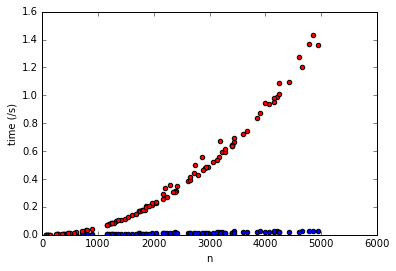

In [112]:
plt.scatter(num_merge, time_merge, c='blue')
plt.scatter(num_insertion, time_insertion, c='red')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

At values of n≈10 (We choose 80), both insertion sort and mergesort have similar runtimes, although insertion sort is slightly faster up until around n = 120, where it starts to slowly curve upwards whilst mergesort stays relatively linear.  At higher values of n≈1000 (we choose 5000) the difference in runtime was quite stark as the insertion sort curved upwards quite dramatically while the merge sort only curved upwards gradually. We expected this as this reflects their worst case runtimes of O(n^2) and O(nlogn) respectively.  

Due to insertion sorts better performance for numbers less than 120, it is reasonable to suspect that using insertion sort for the base case of mergesort would create a more efficent algorithm than both, as shown below.

### 1d. Implement `hybrid_sort()`

Implement `hybrid_sort()`, a `merge_sort()` variant which uses `insertion_sort()` for the base case. The problem size for which the base case is invoked has to be inferred from your above running time analysis.

In [118]:
def hybrid_conquer(arr, start, end):
    threshold = 800 #WE DECIDED THIS VALUE FROM GRAPH ABOVE
    if end - start - 1 >= threshold:
        middle = int((start + end) / 2)
        hybrid_conquer(arr, start, middle)
        hybrid_conquer(arr, middle, end)
        merge(arr, start, middle, end)
    else:
        insertion_sort(arr)

In [119]:
def hybrid_sort(a):
    sorted_list = list(a)
    hybrid_conquer(sorted_list, 0, len(a))
    return sorted_list

Use this test to confirm your implementation is correct.

In [120]:
x = [2, 4, 1, 3]
print(hybrid_sort(x) == [1, 2, 3, 4])

True


### 1e. Analyse all three sorting implementations together

Draw a graph showing the running time performance of your `insertion_sort()`, `merge_sort()` and `hybrid_sort()` for different lengths of random integers.

In [121]:
#hybrid sort data
num_hybrid = []
time_hybrid = []
for r_list in random_lists:
    time_hybrid.append(time_f(lambda: hybrid_sort(r_list)))
    num_hybrid.append(len(r_list))

(0, 1.6000000000000001)

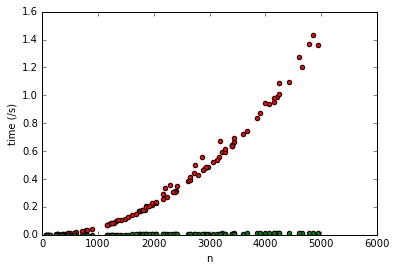

In [123]:
plt.scatter(num_insertion, time_insertion, c='red')
plt.scatter(num_hybrid, time_hybrid, c='green')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

(0, 0.039999999999999994)

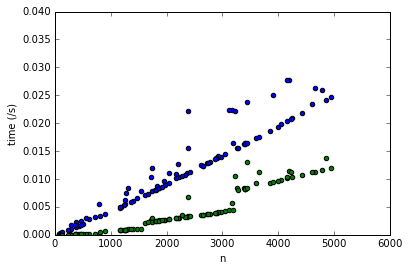

In [122]:
plt.scatter(num_merge, time_merge, c='blue')
plt.scatter(num_hybrid, time_hybrid, c='green')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

Our implementation of hybrid sort performs extremely well in comparision to the mergesort and especially towards the insertion sort.  At list length less than or equal to 120, insertion sort and our hybrid sort perform similarly as they both use insertion sort due to our threshold size and are both slightly faster than merge sort at almost all of these list sizes as well.  At greater sizes, the mergesort again had a faster runtime than insertion sort but our hybrid sort sort maintained almost linear running time even up to 5000 along side mergesort.  

Due to our hybrid's implementation, it has a faster running time than mergesort and insertion sort at all values up to list lengths of 5000.  This allows us to hypothesis that a worst case upper bound of our hybrid sort is O(nlogn) and it could be less.  

We at first decided to choose 120 as our threshold for the base case of our hybrid sort but then realised that higher numbers resulted in a smaller runtime.  We deduced that this was due to solving more subproblems of mergesort with insertion sort meant that less divisions were needed in the mergesort.  We then settled for list lengths of 800 being the best option for our base case as it meant we still had a faster runtime ast smaller values of n and drastically smaller values for large values of n.